### Цель: на основе данных из трех таблиц:
#### 1. Визиты на сайте
#### 2. Покупки на сайте
#### 3. Затраты на привлечение пользователей
#### Нужно определить:
* На сколько окупились инвестиций на привлечение пользователей 
2. Определить cколько людей пользуются в день, неделю, месяц
3. Определить сколько сессий в день
4. Определить сколько длится одна сессия
5. Насколько часто люди возвращаются
6. В какое время люди начинают покупать
7. Сколько раз покупают за период в данных
8. Какой средний чек на каждого пользователя
9. Сколько денег приносят пользователи
10. Стоимость привлечения одного покупателя

* [Исследование данных и предообработка данных](#1.-Исследование-данных-и-предообработка-данных)
  1. Исследавание данных.
  2. Поиск пропусков и дубликатов, пропущенных значиний

* [Отчёты по продажам, по продукту и маркетингу.](#2.-Отчёты-по-продажам,-по-продукту-и-маркетингу.)
  1. Метрики по продукту
  2. Метрики по продажам
  3. Метрики по за затратам на маркетинг

* [Общий вывод](#3.-Общий-вывод)

### 1. Исследование данных и предообработка данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# Импортируем нужные библиотеки

In [1]:
# Открытие данных с помощью read_csv() трех таблиц
# выводится информация по столбцам методом info()

### Структура данных 3 таблиц:
#### Таблицы с визитами:
* device - тип устройства с которого заходил пользователь
* end_ts - дата конеца сессии       
* source_id - номер источника откуда пришел клиент
* start_ts - дата начала сессии
* uid - уникальный номер пользователя

#### Таблицы с покупками:
* buy_ts - время покупки
* revenue - выручка по пользователю
* uid - уникальный номер пользователя   

#### Таблицы с затратами:
* source_id - номер источника откуда пришел клиент
* dt - дата затрат         
* costs - затраты на пользователя  

In [ ]:
# Также проверяем методом duplicated() наличие дубликатов и методом isna() пропущенные значения
# Приводим методом to_datetime() нужные столбцы к формату времени
# Приводим названия столбцов к нижнему регистру методом lower() в двух столбцах
# Также ищем некорректные значения по выручке, и по началу и конецу времени сессии, чтобы начало не было больше конца сеанса

#### В таблице visits есть две ошибки начальное время сессии пользователя больше, чем конечное время сессии, и в таблице orders с выручкой имеется строки с выручкой равной нулю.

#### Пропусков и дубликатов в 3 таблицах нету, перевел типы данных в формат времени столбцы в типом object

### 2. Отчёты по продажам, по продукту и маркетингу.

### 1). Метрики по продукту

23228.416666666668

5724.415094339623

907.9917582417582

Text(0.5, 0, 'day')

Text(0, 0.5, 'uid_count')

Text(0.5, 0, 'week')

Text(0, 0.5, 'uid_count')

Text(0.5, 0, 'month')

Text(0, 0.5, 'uid_count')

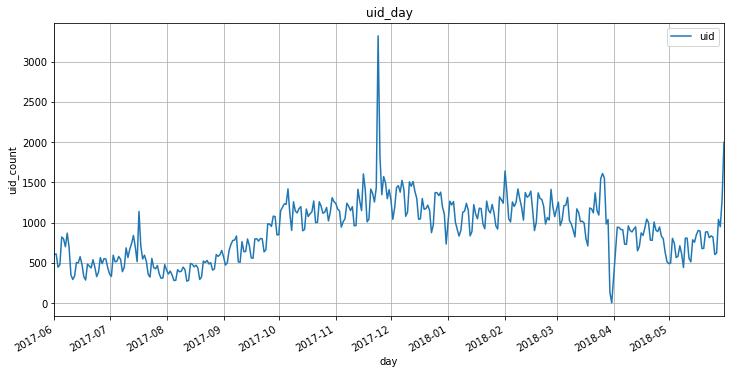

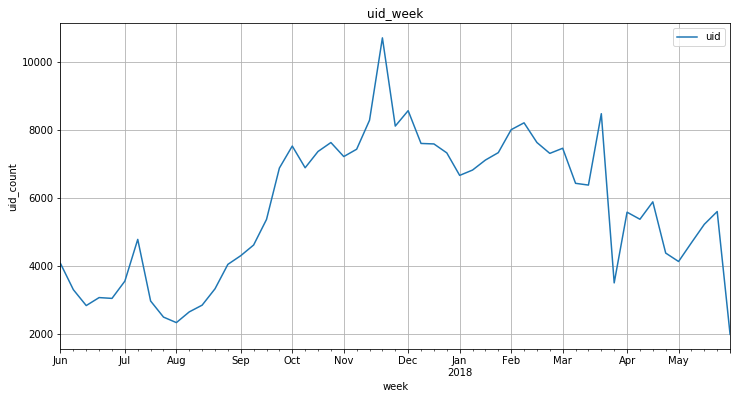

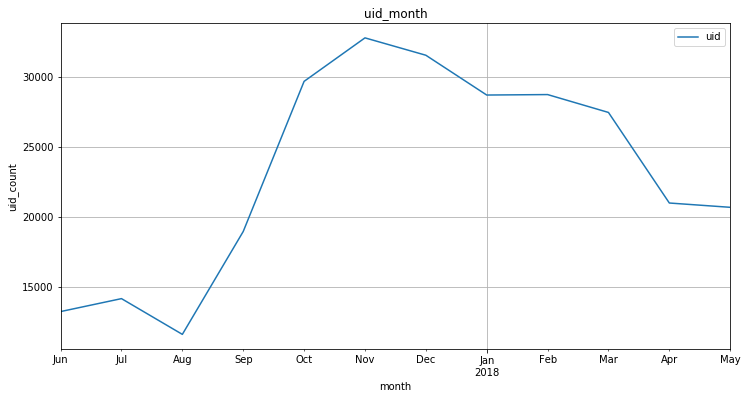

In [5]:
# Делаем срез начала сеанса по месяцам, неделям, дням и группируем среднее число уникальных пользователей по ним,
# и строим график по ним

#### Количество поситителей в среднем в месяц составляет 23228 пользователей,в неделю, 5724 пользователя, в день 907 пользователей, в субботу и воскресение меньше всего пользователей, по сравнению в другими днями, с 7 часов по 12 часов кол-во людей начинает увеличаваться в 4 раза, с августа по ноябрь наблюдалось увеличение кол-ва пользователей, с ноября 2017 по май 2018 идет снижение кол-ва пользователей 

Text(0.5, 0, 'device')

Text(0, 0.5, 'uid_count')

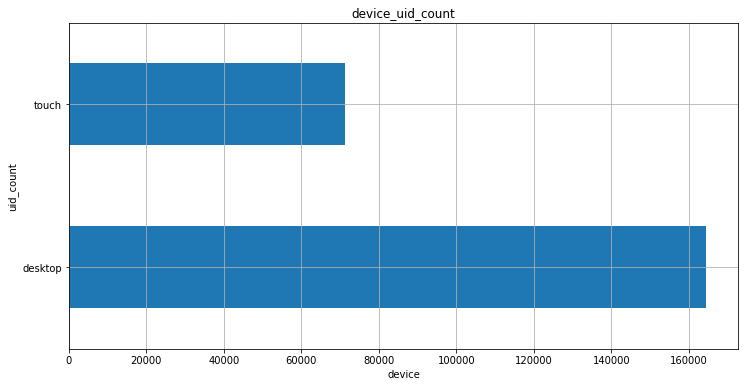

In [6]:
ax = visits.groupby('device')['uid'].nunique().plot.barh(figsize=(12,6),title='device_uid_count',grid=True)
ax.set_xlabel('device')
ax.set_ylabel('uid_count')
# Также строим столбчатый график по девайсам и количеству пользователей

#### С компьютера больще всего пользователей используют сервис это в 2 раза больше, чем с телефона

987.3626373626373

1.082169644003972

Text(0.5, 0, 'year')

Text(0, 0.5, 'sessions')

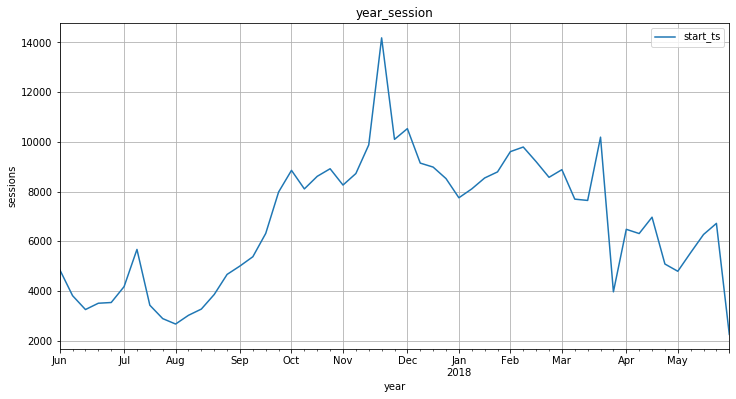

In [7]:
# Считаем среднее количество сессий в день на одного пользователя и строим график

#### Среднее количество сессий за период в данных составляет 987 и среднее кол-во сессий в день на каждого пользователя это 1 сессия, с августа по середину ноября был сильный рост кол-ва сессий более чем в 4 раза, далее с декабря 2017 по май 2018 резкое снижение, до показателей августа 2017 года

10.725108143201632

Text(0.5, 0, 'year')

Text(0, 0.5, 'sessions_duration')

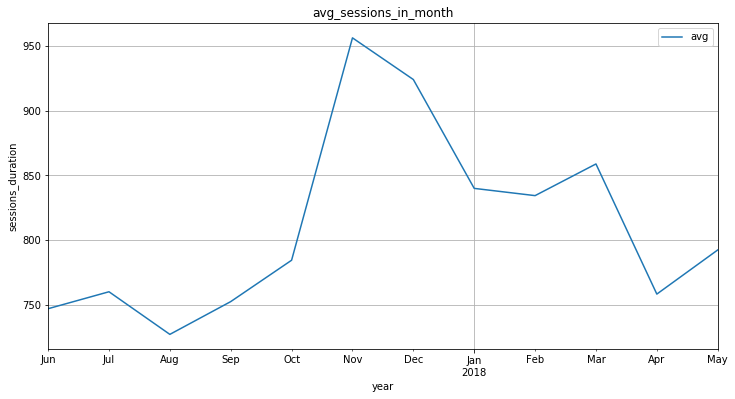

In [8]:
# Считаем среднюю длительность сессии в минутах на одного пользователя и строим график 

#### Средняя длина сессий за год по всем пользователям составляет 10 минут, был рост длительности сессии на пользователя с августа по ноябрь также наблюдается снижение длительности сессии в 1.5 раз, возможно наблюдается сезонность с августа по ноябрь

<Figure size 936x648 with 0 Axes>

Text(0.5, 1.0, 'User Retention')

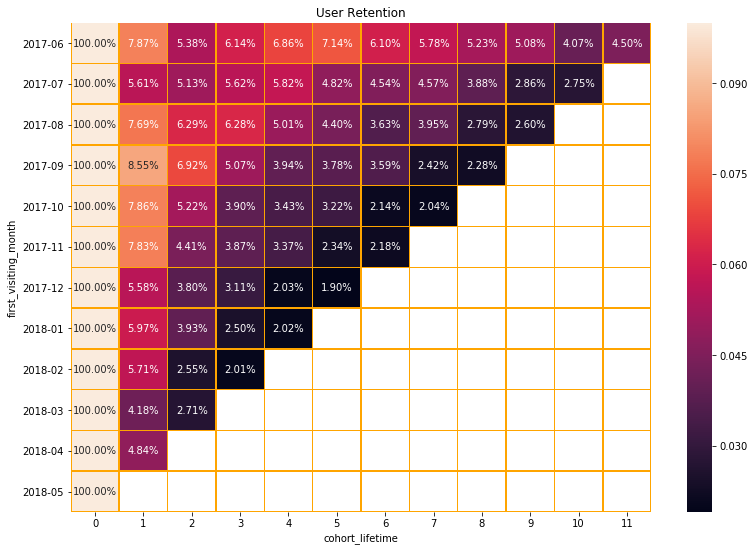

In [9]:
plt.figure(figsize=(13, 9))
plt.title('User Retention')
sns.heatmap(retention_pivot, annot=True, fmt='.2%', linewidths=0.5, linecolor='orange', vmax=0.1)
# Считаем когорту которая впервые посетила сайт, определяем время жизни когорты по месяцам, 
# строим сводную таблицу по удержанию пользователей по каждой когорте и строим тепловую карту

#### Первые когорты людей по месяцам, примерно 7% людей приходят во второй месяц далее в последующие месяца уменьшается не сильно  примерно на 1- 2 % в каждый последующий месяц, в когорте 06-2017 месяца и 09-2017 месяца больше всех людей продожали пользоваться сайтом, относительно первого месяца в 6 это 7.87%, а в 9 это 8.55%.

### 2). Метрики по продажам

16.0

Text(0, 0.5, 'count')

Text(0.5, 0, 'sessions_duration')

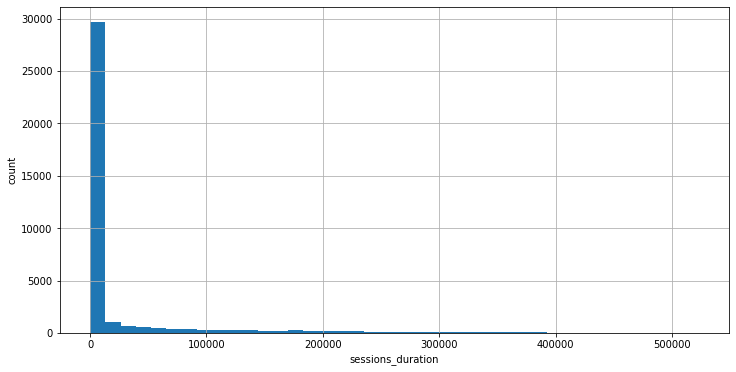

In [10]:
# Определяем по когортам первые совершенные покупки, строим гистограмму по покупкам

#### На гистограмме изображено кол-во сессий в определенной длительностью, достаточно большой разброс значений, поэтому считаю медиану, она равна 16 мин на пользователя.

Text(0.5, 0, 'week')

Text(0, 0.5, 'buys')

Text(0.5, 0, 'day')

Text(0, 0.5, 'buys')

Text(0.5, 0, 'month')

Text(0, 0.5, 'buys')

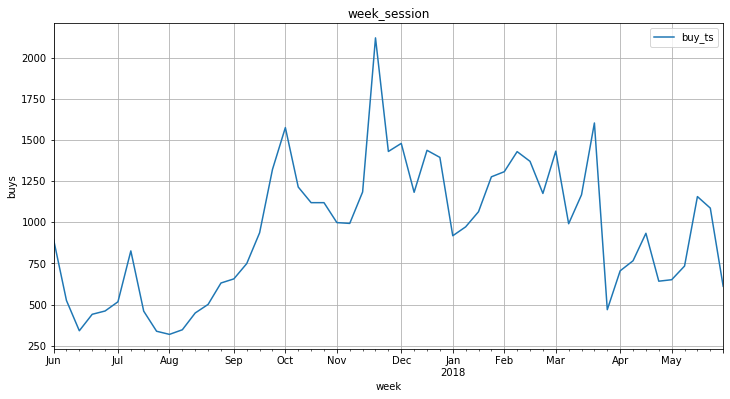

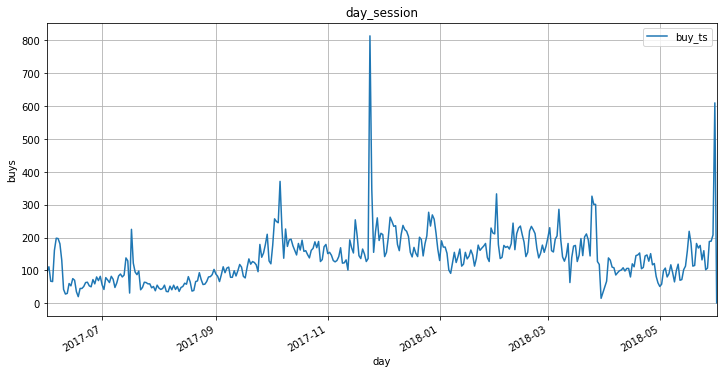

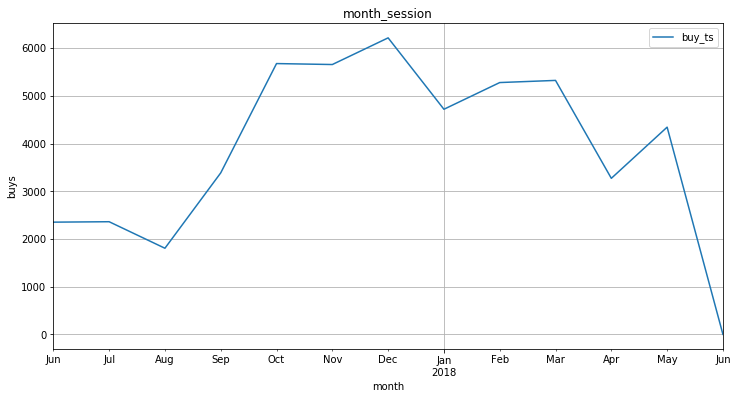

In [11]:
# Строим графики по количеству покупок по дня, неделям, месяцам

#### Резкий  всплеск наблюдается с 19 до 21 часа, больше всего люди делают покупок в 12-13 часов, также с 7 - 12 дня наблюдается рост покупок в 20 раз, в выходные относительно других дней кол-во покупок снижается в 1.5 раза, с декабря 2017 по май 2018 года наблюдается снижение покупок в 6 раз 

In [12]:
# Считаем среднее и медианное количество покупок на пользователя

1.3803630588943954

1.0

#### В среднем на одного человека приходиться 1.38 покупок, но большая часть людей делает не больше 1 покупки на одного человека

Text(0.5, 0, 'year')

Text(0, 0.5, 'avg_buys_count')

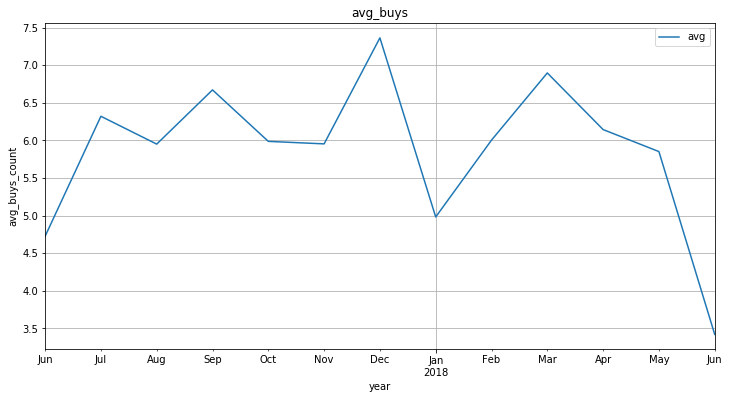

In [13]:
# Считаем средний чек на пользователя по месяцам

#### Стоимость покупки на одного пользователя в среднем составляет 7 рублей, с декабря 2017 по январь 2018 года было снижение чека в 1.5 раза, далее с января по март 2018 увеличение среднего чека, а с марта по май 2018 идет снижение чека в 2 раза

<Figure size 936x648 with 0 Axes>

Text(0.5, 1.0, 'LTV')

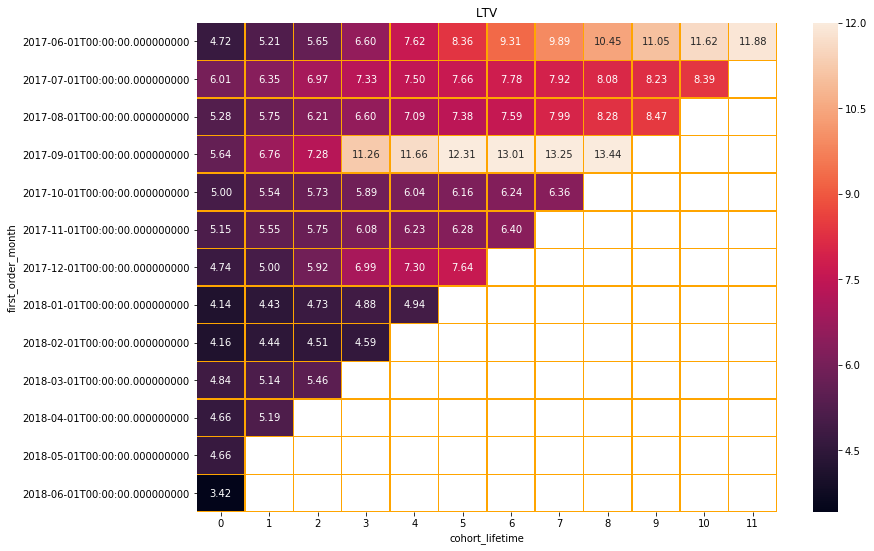

In [14]:
# Также определяем когорты пользователей по месяцам и считаем по ним выручку

#### В когортах с 2017-06 по  2017-09 наблюдается большой рост дохода с групп, возможно эти когорты являются прямой целевой аудиторией, особенно когорта 2017-09 наблюдается резкий прирост выручки в 1.5 раза с 11-2017 по 12-2017.

### 3). Маркетинговые затраты

329131.62

Text(0.5, 0, 'source')

Text(0, 0.5, 'costs')

Text(0.5, 0, 'dt_month')

Text(0, 0.5, 'costs')

<Figure size 1008x432 with 0 Axes>

Text(0.5, 1.0, 'source_costs')

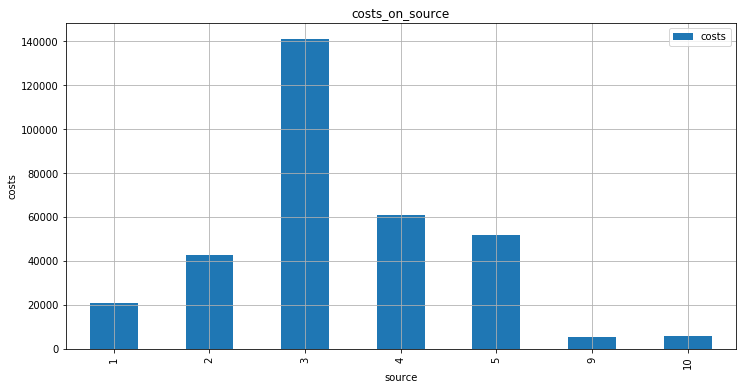

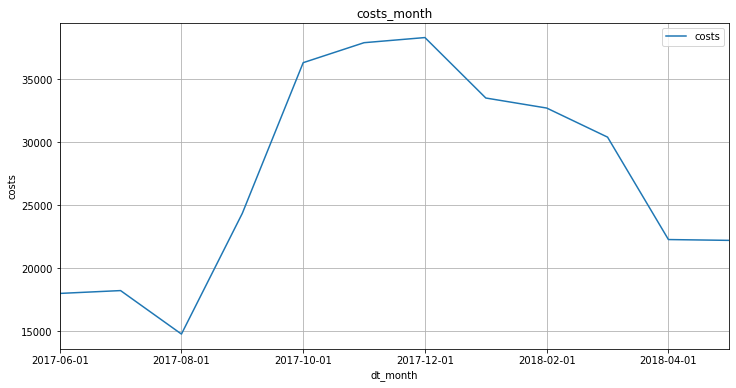

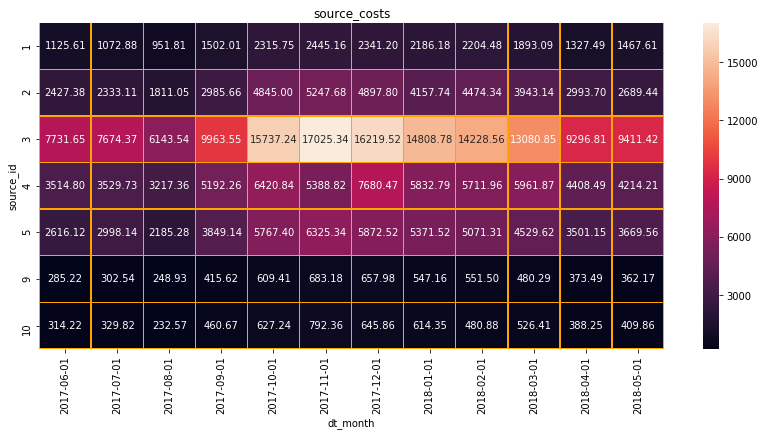

In [15]:
# Считаем стоимость привлечения пользователей по источникам и месяцам, строим графики

#### Самые большие затраты на привлечение одного пользователя наблюдаются в 3 источнике привлечения, также в период с августа по октябрь наблюдается резкий рост затрат на привлечение, далее с декабря 2017 по апрель 2018 наблюдается спад затрат до уровня 09-2017, также есть рост затрат на 3 источник на привлечение, также после 12-2017 идет снжение затрат, возможно из за уменьшает кол-во пользователей и снижение сессий

<Figure size 936x288 with 0 Axes>

Text(0.5, 1.0, 'cac_source')

Text(0.5, 15.0, 'lifetime')

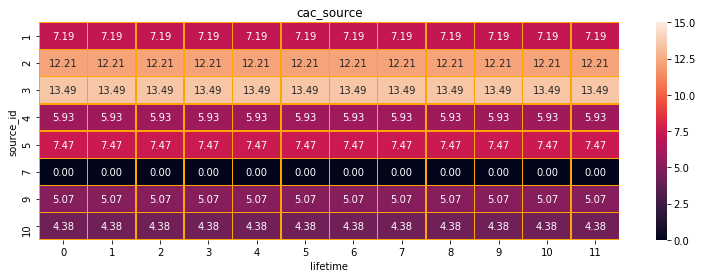

In [16]:
# Также считаем по источникам затраты на пользователей по месяцам

<Figure size 936x288 with 0 Axes>

Text(0.5, 1.0, 'ltv_source')

Text(0.5, 15.0, 'lifetime')

<Figure size 936x288 with 0 Axes>

Text(0.5, 1.0, 'romi_source')

Text(0.5, 15.0, 'lifetime')

-0.2341750695360111

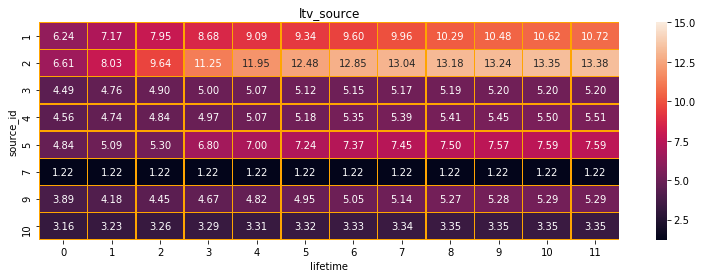

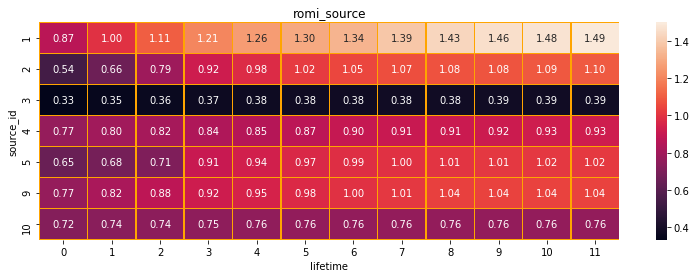

In [17]:
# Считаетм выручку по клиентам и по источникам
# Потом считаем рентабельность инвестиций по источникам

#### Выручка с первого и второго источника наблюдается больше других, возможно стоит переключиться с 3 источника на первые два, также с этих источников окупаемость проходит быстрее на 4-5 месяц жизни когорты по сравнению с 3 источником, общая рентабельность инвестиций = - 0.23

### 3. Общий вывод

#### Исходя из общих данных таблиц, можно сделать вывод - 
#### 1.Количество поситителей в среднем в месяц составляет 23228 пользователей,в неделю, 5724 пользователя, в день 907 пользователей, в субботу и воскресение меньше всего пользователей, по сравнению в другими днями, с 7 часов по 12 часов кол-во людей начинает увеличаваться в 4 раза, с августа по ноябрь наблюдалось увеличение кол-ва пользователей, с ноября 2017 по май 2018 идет снижение кол-ва пользователей почти 
#### 2.  С компьютера больще всего пользователей используют сервис это в 2 раза больше, чем с телефона
#### 3. Среднее количество сессий за период в данных составляет 987 и среднее кол-во сессий в день на каждого пользователя это 1 сессия, с августа по середину ноября был сильный рост кол-ва сессий более чем в 4 раза, далее с декабря 2017 по май 2018 резкое снижение, до показателей августа 2017 года
#### 4. Средняя длина сессий за год по всем пользователям составляет 10 минут, был рост длительности сессии на пользователя с августа по ноябрь также наблюдается снижение длительности сессии в 1.5 раз, возможно наблюдается сезонность с августа по ноябрь
#### 5.Первые когорты людей по месяцам, примерно 7% людей приходят во второй месяц далее в последующие месяца уменьшается не сильно примерно на 1- 2 % в каждый последующий месяц, в когорте 06-2017 месяца и 09-2017 месяца больше всех людей продожали пользоваться сайтом, относительно первого месяца в 6 это 7.87%, а в 9 это 8.55%
#### 6. На гистограмме изображено кол-во сессий в определенной длительностью, достаточно большой разброс значений, поэтому считаю медиану, она равна 16 мин на пользователя
#### 7. Резкий рост покупок в 12-13 часов, также с 7 - 12 дня наблюдается рост покупок , в выходные относительно других дней кол-во покупок снижается в 1.5 раза, с декабря 2017 по май 2018 года наблюдается снижение покупок  
#### 8. В когортах с 2017-06 по 2017-09 наблюдается большой рост дохода с групп, возможно эти когорты являются прямой целевой аудиторией, особенно когорта 2017-09 наблюдается резкий прирост выручки в 1.5 раза с 11-2017 по 12-2017
#### 9. Самые большие затраты на привлечение одного пользователя наблюдаются в 3 источнике привлечения, также в период с августа по октябрь наблюдается резкий рост затрат на привлечение, далее с декабря 2017 по апрель 2018 наблюдается спад затрат до уровня 09-2017, также есть рост затрат на 3 источник на привлечение, также после 12-2017 идет снжение затрат, возможно из за уменьшает кол-во пользователей и снижение сессий
#### 10. Выручка с первого и второго источника наблюдается больше других, возможно стоит переключиться с 3 источника на первые два, также с этих источников окупаемость проходит быстрее на 4-5 месяц жизни когорты по сравнению с 3 источником, общая рентабельность инвестиций = - 0.23, 3 источник не окупается
#### Общие рекомендации: лучшие источники 1 и 2 по окупаемости и прибыли,  компьютер является более доходным, когорта 06 и 09-2017 больше всего покупали, общее снижение по 1) по длительности 2) по кол-ву пользователей 3) по кол-ву сессий с 12-2017 по 05-2018, 3 источник не окупается, возможно стоит переключиться с 3 на 1 и 2 источник